In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,make_scorer
import seaborn as sns
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
# Load the dataset
data = pd.read_csv('cleaned_data.csv')  # Update the path to your dataset file


#data=data.sample(200000)

# Check for NaN values and fill them with a placeholder string (e.g., "missing")
data.fillna("missing", inplace=True)



In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from joblib import dump, load
import nltk

nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
custom_stopwords = [
    "i","im","like", "feel", "feeling", "my", "the", "to",
                     "for","know","littl","think","time","thing","would","go",
                     "realli","feel","am","so","get", "one", "to", "and", "at", "can",
                     "day","way", "make", "me", "want", "could" , "would", "tri", "u"                      
                     ]


all_stopwords=stopwords.words('english') + custom_stopwords

print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
#  function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace all runs of whitespaces with a single space
    # Optionally, remove stopwords and stem
    words = text.split()
    words = [word for word in words if word not in all_stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [29]:

def reduceLabels(text):
    # print(type(text))
    if text==0 or text==3:
        return 0
    elif text==1 or text==2:
        return 1
    elif text==4 or text==5:
        return 2
    return 2



In [30]:
# Define your label to emotion mapping
# label_to_emotion = {0: 'Sad', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

label_to_emotion ={0:'Negative',1:'Positive',2:'Neutral'}

# for label, emotion in label_to_emotion.items():
#     # Filter texts by current label
#     filtered_texts = data[data['label'] == label]['text'].str.cat(sep=' ')
#     # Generate word cloud
#     wordcloud = WordCloud(background_color='white', max_words=100).generate(filtered_texts)
#     # Display the word cloud
#     plt.figure(figsize=(5, 3))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(f'Word Cloud for {emotion}')
#     plt.axis('off')
#     plt.show()

In [31]:
# for label, emotion in label_to_emotion.items():
#     # Filter texts by current label
#     filtered_texts = ' '.join(data[data['label'] == label]['text'].tolist())
    
#     # Tokenize and count words
#     words = word_tokenize(filtered_texts)
#     freq_dist = FreqDist(words)
    
#     # Get top 5 words and their frequencies
#     top_15_words = freq_dist.most_common(15)
#     words, frequencies = zip(*top_15_words)  # This separates the words and their frequencies
    
#     # Plotting
#     plt.figure(figsize=(14, 2))
#     plt.bar(words, frequencies, color='skyblue')
#     plt.xlabel('Words')
#     plt.ylabel('Frequency')
#     plt.title(f'Top 15 Words for {emotion}')
#     plt.show()

In [32]:
# Creating a pipeline that includes TF-IDF vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000))
])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)




In [33]:
# Train your model
pipeline.fit(X_train, y_train)

# Predict and evaluate
predictions = pipeline.predict(X_test)



Accuracy: 0.9351623041673665
Precision: 0.9350896852402578
Recall: 0.9351623041673665
F1 Score: 0.935117616753079



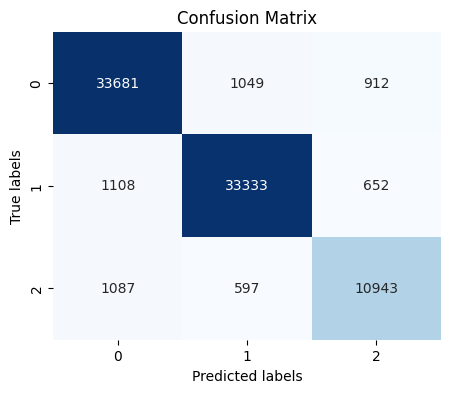

In [34]:
accuracy = accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average='weighted')  # Use 'macro' or 'micro' based on your needs
recall = recall_score(y_test, predictions, average='weighted')  # Use 'macro' or 'micro' based on your needs
f1 = f1_score(y_test, predictions, average='weighted')  # Use 'macro' or 'micro' based on your needs
cm = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print()
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [35]:
# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Perform 5-fold cross-validation
# cv_results = cross_validate(pipeline, data['text'], data['label'], cv=5, scoring=scoring)



In [36]:
# Display detailed results for each fold
# for metric in scoring.keys():
#     for fold_index, score in enumerate(cv_results[f'test_{metric}']):
#         print(f"{metric} fold {fold_index + 1}: {score}")
    
#     # Display aggregated results (mean and standard deviation)
#     print(f"{metric} - Mean: {np.mean(cv_results[f'test_{metric}'])}, Std: {np.std(cv_results[f'test_{metric}'])}\n")

In [37]:
from sklearn.metrics import accuracy_score

# Assuming 'pipeline' is your trained model including the TF-IDF vectorizer and logistic regression

# Example new data
new_data = ["Wow!! This is unexpected",
            "I really don't wanna stay in my house tonight. It's so creepy out there",
            "But very unfortunately I am forced to take this decision due to my persisting tailbone injury which needs immediate attention. Will need all your support and good will to heal at the earliest, and come back to do more.",
              "I love you", "I'm so happy",
                "I'm so pissed right now", 
                "I'm scared of snakes", 
                "Don't over do that again",
                "I'm just so grateful for everything right now.", "It's just frustrating when you're not being heard.", "I can't believe they would do something like this. I'm livid.", 'Every moment with you is a treasure.', 'Wow, I did not see that coming at all!',
                'The sun is shining, and so is my heart.', 'This is just unfair and it makes my blood boil.', 'Every moment with you is a treasure.', "Love is in the air, and I'm here for it.", "I'm shocked, in a good way!",
                'The world feels a little dimmer today, missing you.', "I can't shake this feeling of dread.", "There's something about this place that just feels off.", "I can't believe I'm going through this again. It's heartbreaking.", 'Every time I think about it, I get angry all over again.',
                "I can't believe I'm going through this again. It's heartbreaking.", 'Every time I think about it, my heart just sinks.', "It's just frustrating when you're not being heard.", 'Every time I think about it, my heart just sinks.', 'Every time I think about it, my heart just sinks.',
                "It's just one of those days where everything feels harder than it should.", "There's something about this place that just feels off.", "It's just frustrating when you're not being heard.", "It's just one of those days where everything feels harder than it should.", 'Every shadow makes my heart race tonight.',
                "Your presence brings me such joy and peace, it's indescribable.",
    "Every moment with you feels like a dream I never want to wake up from.",
    "The way you look at me, with so much love and affection, melts my heart every time.",
    "Holding your hand feels like finding a piece of the universe that was made just for me.",
    "Your love is like a warm embrace on a cold winter's night, comforting and essential.",
     "With you, every place feels like home and every moment is a treasure.",
    "Your laughter is a melody that my heart wants to play on repeat.",
    "Being loved by you is a blessing I thank the stars for every night.",
    "Your eyes hold a universe I want to explore, filled with love and mysteries.",
    "Love is what we've been through together, and every struggle made it stronger.",
     "I never expected this turn of events, but I'm thrilled!",
    "The surprise party you threw for me was beyond my wildest dreams!",
    "Finding out the news left me in a state of shock and happiness.",
    "I was taken aback by the unexpected gift; it was such a pleasant surprise.",
    "The twist at the end of the story caught me completely off-guard.",
    "Never in a million years did I see that coming!",
    "The sudden revelation was a surprise that left me speechless.",
    "Discovering the hidden message was like uncovering a treasure.",
    "The moment you revealed the surprise, my heart skipped a beat.",
    "It was a shock to see everyone there, waiting to surprise me!",
     "The silence in the room felt heavier than usual, echoing my somber thoughts.",
    "Losing you has left a void in my heart that nothing seems to fill.",
    "Watching the sunset, I felt a loneliness that seemed to mirror my own.",
    "The news hit me like a cold wave, leaving a chill of sadness.",
    "It's hard to find the words to express the sorrow that's weighing on me.",
    "The empty chair at the table served as a painful reminder of what was lost.",
    "Tears were my silent response to a world that suddenly seemed too harsh.",
    "I miss you more with each passing day, and the pain doesn't seem to fade.",
    "The joy we once shared now feels like a distant memory, hard to grasp.",
    "Saying goodbye was the hardest thing I've ever had to do.",
     "The laughter that filled the room was contagious, bringing smiles to all.",
    "Finding that one person who gets you is like discovering a hidden treasure.",
    "The warmth of the sun on my face reminded me of the joy in simple things.",
    "Receiving the news brought a surge of happiness I hadn't felt in a while.",
    "The beauty of the world in bloom is enough to make anyone's heart lighter.",
    "Joy comes in moments, often unexpected, but always welcome.",
    "Seeing your smile is all it takes to make my day infinitely better.",
    "The thrill of achievement is a high that nothing else can match.",
    "Happiness is finding peace in the chaos, a quiet moment of contentment.",
    "There's a unique joy in making someone else smile, a warmth that spreads.",
     "Every shadow in the dark seemed to whisper my name, heightening my fear.",
    "The thought of losing everything I hold dear terrifies me beyond words.",
    "Hearing the howl of the wind, I felt as if danger was lurking around every corner.",
    "The uncertainty of what lies ahead fills me with a deep, unsettling fear.",
    "My heart races at the thought of facing my deepest fears alone.",
    "There's something about the silence of the night that amplifies my fears.",
    "The creaking of the floorboards in an empty house sends shivers down my spine.",
    "I'm haunted by the fear that I may never find my way back to where I belong.",
    "The fear of failure looms over me, a constant shadow that I can't seem to escape.",
    "Being trapped in a place with no escape is the stuff of my nightmares.",
    "The injustice of the situation filled me with an intense rage.",
    "Every time I think about the betrayal, a fierce anger bubbles up inside me.",
    "The frustration of being powerless in that moment turned into seething anger.",
    "Feeling overlooked and undervalued ignited a spark of anger in me.",
    "The blatant disrespect shown to me was enough to make my blood boil.",
    "I clenched my fists in anger, struggling to calm the storm within.",
    "The constant noise was driving me to the edge, my patience turning to anger.",
    "Seeing the unfairness unfold before my eyes, my temper flared uncontrollably.",
    "Their words were like fuel to the fire of my anger, making it burn brighter.",
    "The more I tried to let it go, the stronger my anger grew, consuming my thoughts.",
    "The eerie silence of the forest made every sound seem like a threat.",
    "Lying awake at night, I imagined all sorts of horrors lurking in the dark.",
    "The thought of being watched when I was alone sent a chill through me.",
    "Hearing footsteps behind me in the empty street made my heart race with fear.",
    "The fear of the unknown had always been a powerful, paralyzing force.",
    "Seeing shadows move in the darkness filled me with an irrational fear.",
    "The old, abandoned house seemed to hold secrets that were better left undiscovered."
                ]
actual_labels = [5,4,0, 2, 1, 3, 4, 3, 1, 3, 3, 2, 5, 1, 3, 2, 2, 5, 0, 4,
                  4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 3, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                  5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                  3, 3, 3, 3, 3, 3, 3, 3, 3, 3,4, 4, 4, 4, 4, 4, 4]  # Replace with actual labels for new data


mapping={0:'Sad',1:'Joy',2:'Love',3:'Anger',4:'Fear',5:'Surprise'}
print("Sample Tweet:",len(actual_labels))
print()

new_mapping={0:'Negative',1:'Positive',2:'Neutral'}

for i in range(len(actual_labels)):
    actual_labels[i]=reduceLabels(actual_labels[i])



Sample Tweet: 100



In [38]:
# Clean the new data using the same cleaning function used during training
# If you applied text cleaning in the pipeline or before training, ensure to clean new_data similarly
cleaned_new_data = [clean_text(text) for text in new_data]  # Use the same clean_text function defined earlier

# Use the model to make predictions on the new, cleaned data
predictions = pipeline.predict(cleaned_new_data)

# Calculate and print the accuracy
accuracy = accuracy_score(actual_labels, predictions)
f1 = f1_score(actual_labels, predictions, average="weighted")
precision = precision_score(actual_labels, predictions, average="weighted")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print()

# To see the predictions alongside the actual labels
# for pred, actual in zip(predictions, actual_labels):
#     print(f'Predicted: {mapping[pred]}, Actual: {mapping[actual]}')

Accuracy: 0.71
Precision: 0.7901086956521739
F1 Score: 0.706027397260274



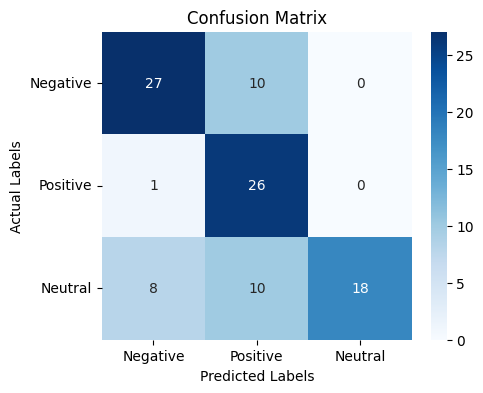

In [39]:


# Assuming 'predictions' and 'actual_labels' are your lists of predicted and actual labels
cm = confusion_matrix(actual_labels, predictions)

# Generate a mapping of emotions for the axis ticks
emotion_labels = [new_mapping[label] for label in sorted(new_mapping)]
emotion_ticks = np.arange(len(emotion_labels))

# Plotting
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.xticks(emotion_ticks + 0.5, emotion_labels)
plt.yticks(emotion_ticks + 0.5, emotion_labels, rotation=0)
plt.show()